In [6]:
import pandas as pd
import numpy as np

# Replace with the correct path where your CSV is saved
Retail_store = pd.read_csv("Online Retail.csv", encoding="ISO-8859-1")

Retail_store.info()
Retail_store.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [25]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load Dataset
Retail_store = pd.read_csv("Online Retail.csv", encoding="ISO-8859-1")

# Step 3: Basic Info
print("Dataset Info:")
print(Retail_store.info())
print("\nFirst 5 Rows:")
print(Retail_store.head())

# Step 4: Handle Missing Values
print("\nMissing Values Before Cleaning:")
print(Retail_store.isnull().sum())

# Drop rows with missing CustomerID (since they can’t be used for segmentation)
Retail_store = Retail_store.dropna(subset=['CustomerID'])

# Fill missing values in Description with 'Unknown'
Retail_store['Description'] = Retail_store['Description'].fillna("Unknown")

print("\nMissing Values After Cleaning:")
print(Retail_store.isnull().sum())

# Step 5: Remove Duplicates
Retail_store = Retail_store.drop_duplicates()

# Step 6: Convert Data Types
Retail_store['InvoiceDate'] = pd.to_datetime(Retail_store['InvoiceDate'], dayfirst=True, errors='coerce')
Retail_store['CustomerID'] = Retail_store['CustomerID'].astype(int)

# Step 7: Remove Invalid or Negative Values
Retail_store = Retail_store[(Retail_store['Quantity'] > 0) & (Retail_store['UnitPrice'] > 0)]

# Step 8: Feature Engineering - Add a Sales column
Retail_store['Sales'] = Retail_store['Quantity'] * Retail_store['UnitPrice']

# Final Check
print("\nCleaned Dataset Info:")
print(Retail_store.info())
print("\nSample Cleaned Data:")
print(Retail_store.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

First 5 Rows:
  ï»¿InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATE

In [26]:
# Step 2: Customer Aggregation
customer_df = Retail_store.groupby("CustomerID").agg({
    "Sales": "sum",          # Total Sales
    "InvoiceDate": "nunique" # Frequency = unique invoices
}).reset_index()

# Rename columns for clarity
customer_df.rename(columns={
    "Sales": "TotalSales",
    "InvoiceDate": "Frequency"
}, inplace=True)

# Add Average Sales column
customer_df["AvgSales"] = customer_df["TotalSales"] / customer_df["Frequency"]

# Preview results
print(customer_df.head())
print(customer_df.describe())


   CustomerID  TotalSales  Frequency      AvgSales
0       12346    77183.60          1  77183.600000
1       12347     4310.00          7    615.714286
2       12348     1797.24          4    449.310000
3       12349     1757.55          1   1757.550000
4       12350      334.40          1    334.400000
         CustomerID     TotalSales    Frequency      AvgSales
count   4338.000000    4338.000000  4338.000000   4338.000000
mean   15300.408022    2048.688081     4.250807    418.683642
std     1721.808492    8985.230220     7.635202   1797.123254
min    12346.000000       3.750000     1.000000      3.450000
25%    13813.250000     306.482500     1.000000    177.867083
50%    15299.500000     668.570000     2.000000    292.032500
75%    16778.750000    1660.597500     5.000000    428.829375
max    18287.000000  280206.020000   210.000000  84236.250000


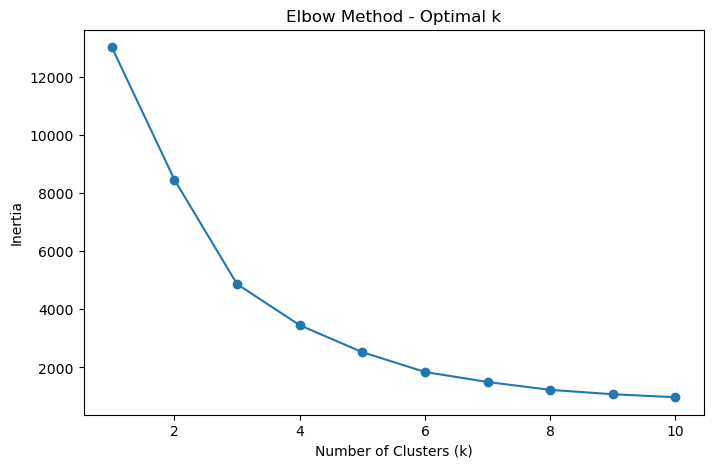

   CustomerID  TotalSales  Frequency      AvgSales  Cluster
0       12346    77183.60          1  77183.600000        1
1       12347     4310.00          7    615.714286        0
2       12348     1797.24          4    449.310000        0
3       12349     1757.55          1   1757.550000        0
4       12350      334.40          1    334.400000        0


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 3.1: Select Features for Clustering
features = customer_df[['TotalSales', 'Frequency', 'AvgSales']]

# Step 3.2: Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3.3: Find Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Optimal k")
plt.show()

# Step 3.4: Apply KMeans with chosen k (example: k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

print(customer_df.head())


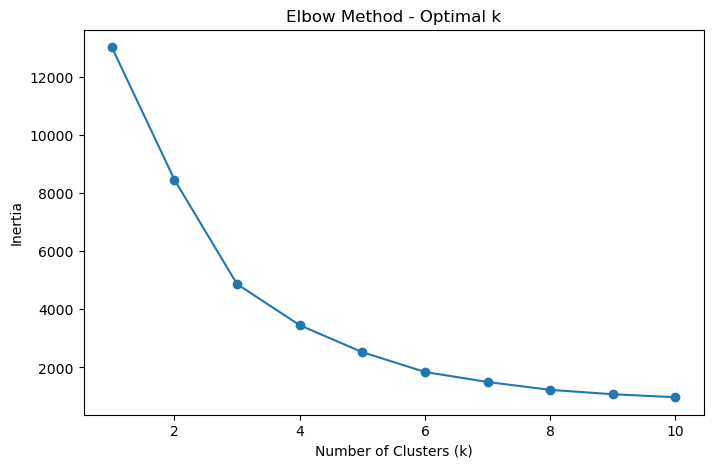

Cluster Profile Summary:

         Num_Customers     TotalSales  Frequency      AvgSales
Cluster                                                       
0                 4092    1098.636528   3.053519    359.132550
1                    2  122828.050000   1.500000  80709.925000
2                  232   11469.660129  21.043103    678.402272
3                   12  123747.580833  88.333333   2322.505665


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 3.1: Select Features for Clustering
features = customer_df[['TotalSales', 'Frequency', 'AvgSales']]

# Step 3.2: Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3.3: Find Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Optimal k")
plt.show()

# Step 3.4: Apply KMeans with chosen k (say k=4 after looking at elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 3.5: Cluster Profile Summary
cluster_summary = customer_df.groupby("Cluster").agg({
    "CustomerID": "count",
    "TotalSales": "mean",
    "Frequency": "mean",
    "AvgSales": "mean"
}).rename(columns={"CustomerID": "Num_Customers"})

print("Cluster Profile Summary:\n")
print(cluster_summary)


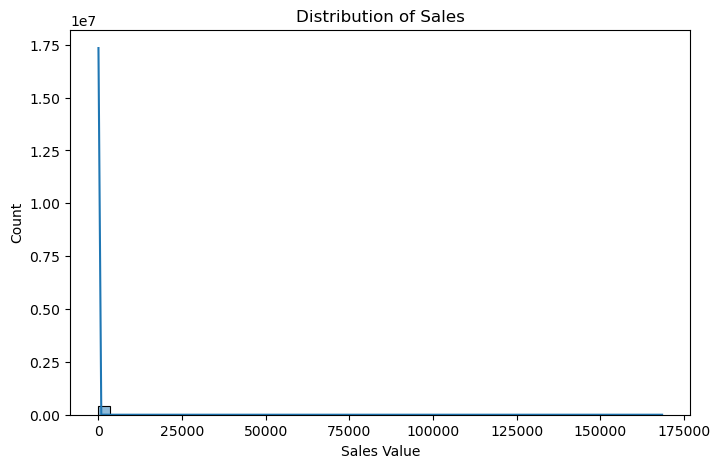

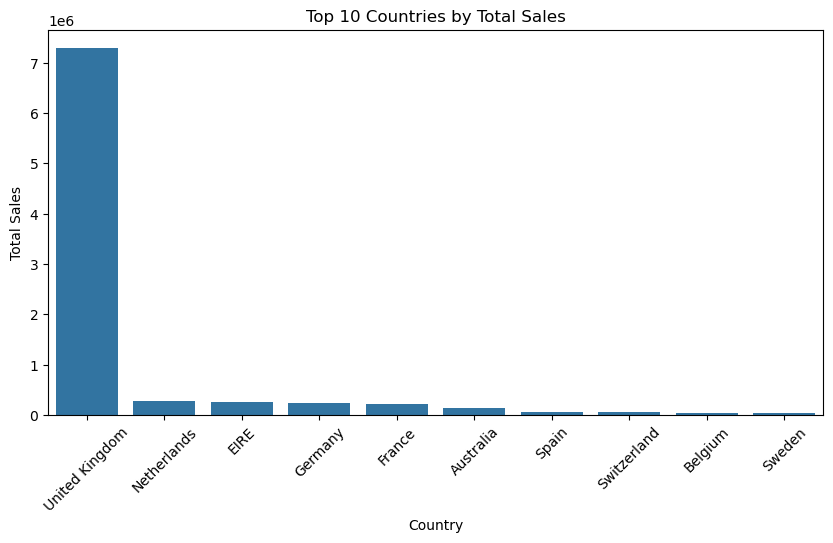

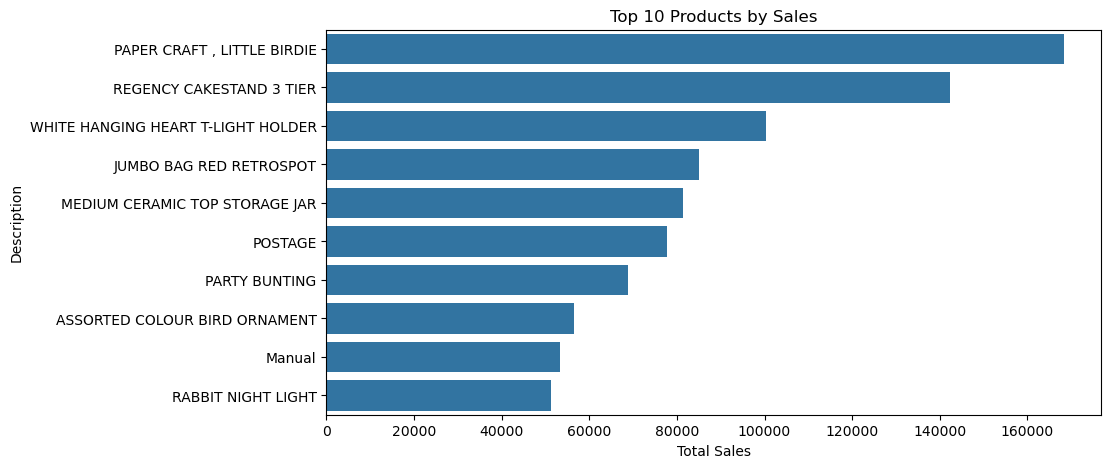

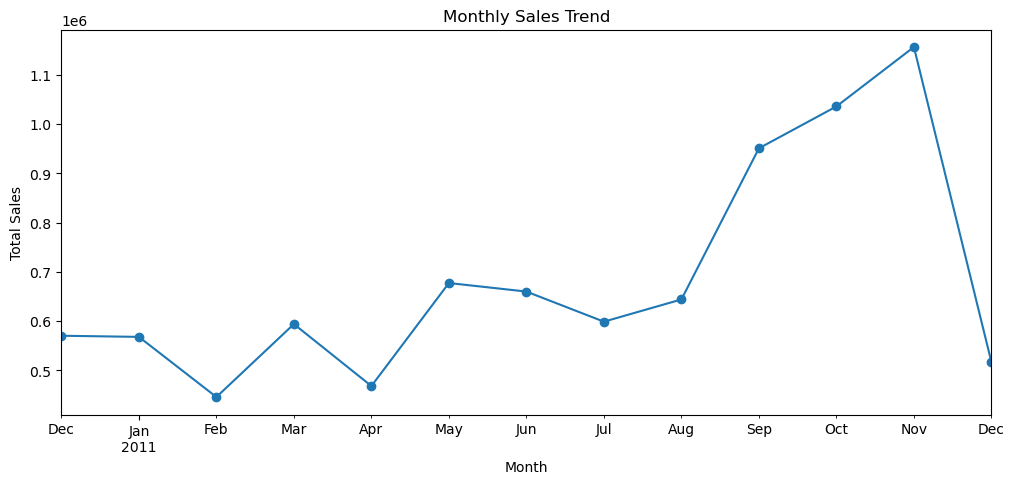

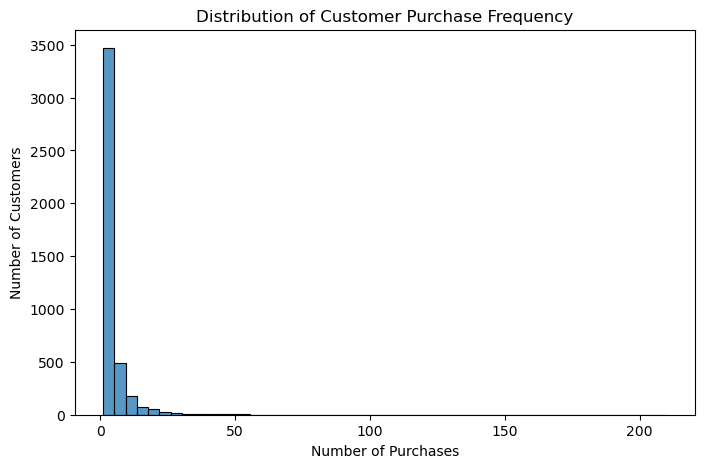

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Step 4: Exploratory Data Analysis (EDA)
# ----------------------------

# 1. Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(Retail_store['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales Value")
plt.ylabel("Count")
plt.show()

# 2. Top 10 Countries by Total Sales
top_countries = Retail_store.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Total Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# 3. Top 10 Products by Total Sales
top_products = Retail_store.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.show()

# 4. Monthly Sales Trend
Retail_store['Month'] = Retail_store['InvoiceDate'].dt.to_period('M')
monthly_sales = Retail_store.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# 5. Customer Purchase Frequency Distribution
plt.figure(figsize=(8,5))
sns.histplot(customer_df['Frequency'], bins=50, kde=False)
plt.title("Distribution of Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


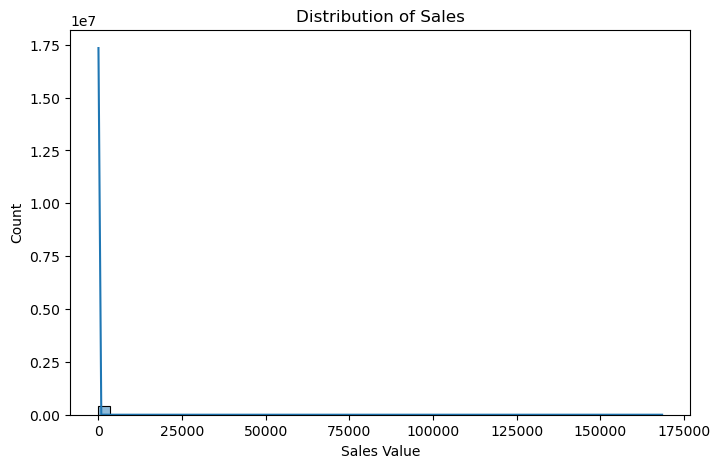

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(Retail_store['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales Value")
plt.ylabel("Count")
plt.show()


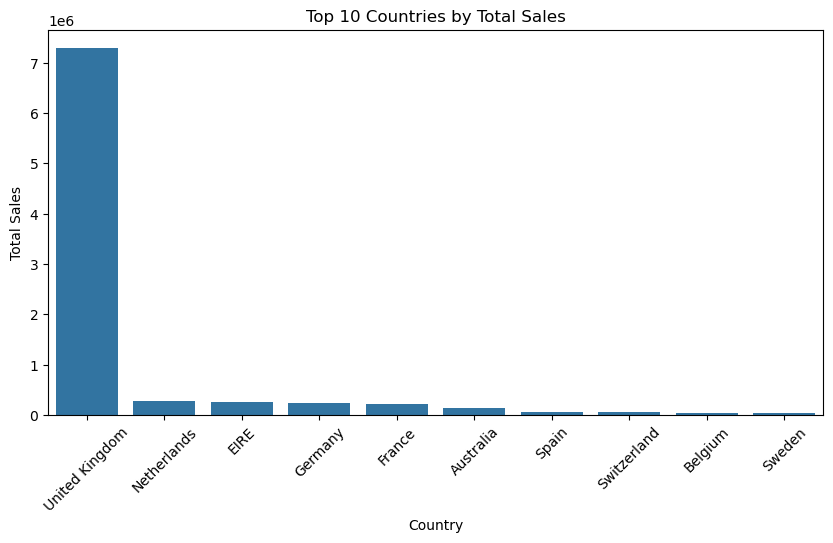

In [34]:
top_countries = Retail_store.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Total Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

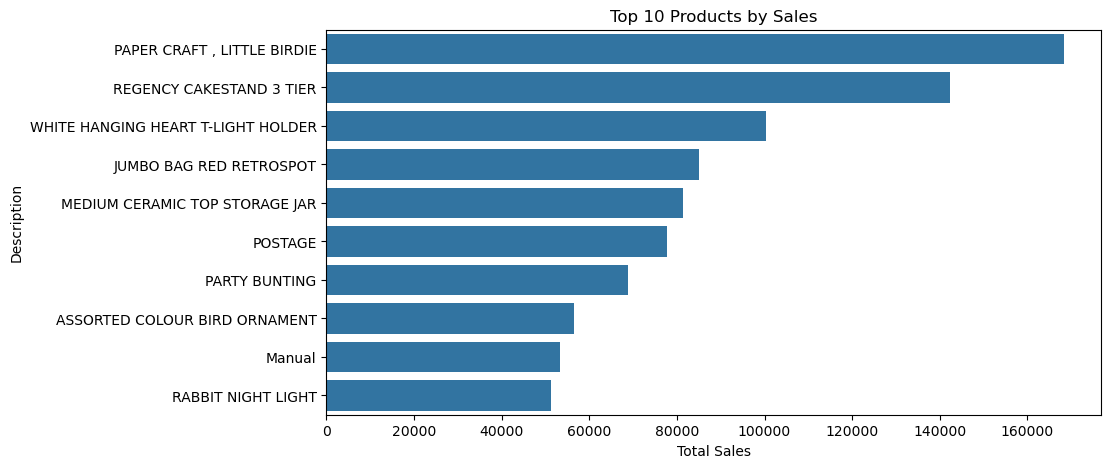

In [35]:
top_products = Retail_store.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.show()


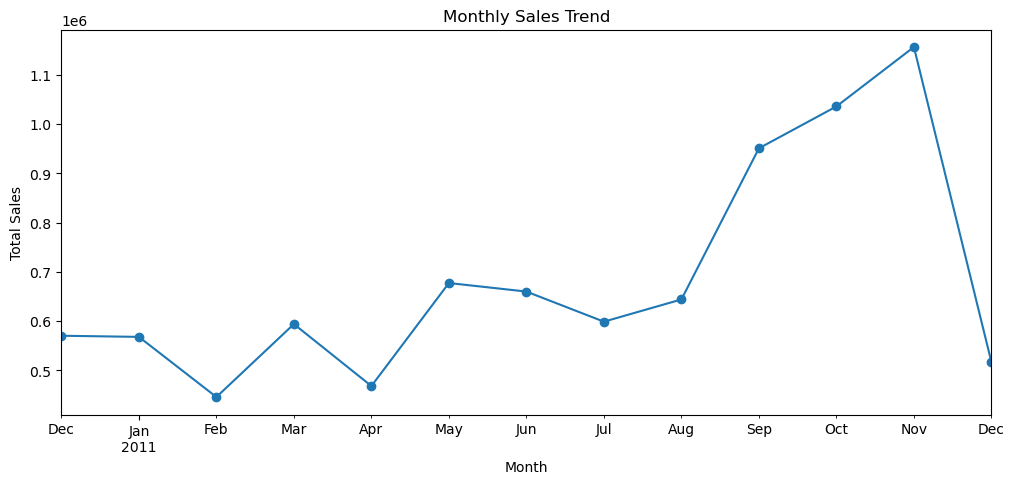

In [36]:
# 4. Monthly Sales Trend
Retail_store['Month'] = Retail_store['InvoiceDate'].dt.to_period('M')
monthly_sales = Retail_store.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


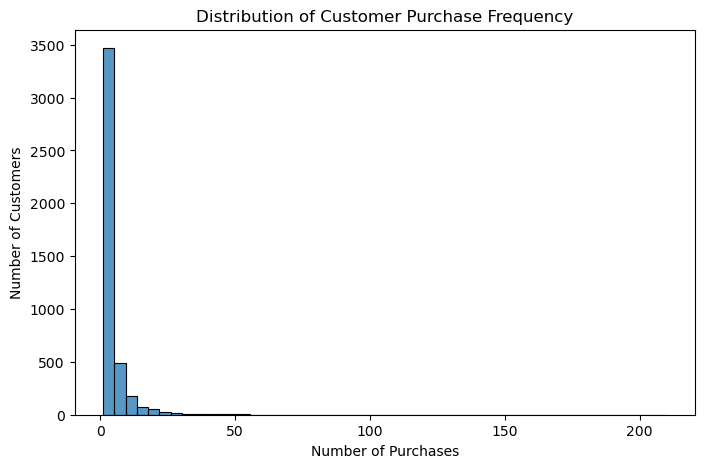

In [37]:
# 5. Customer Purchase Frequency Distribution
plt.figure(figsize=(8,5))
sns.histplot(customer_df['Frequency'], bins=50, kde=False)
plt.title("Distribution of Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


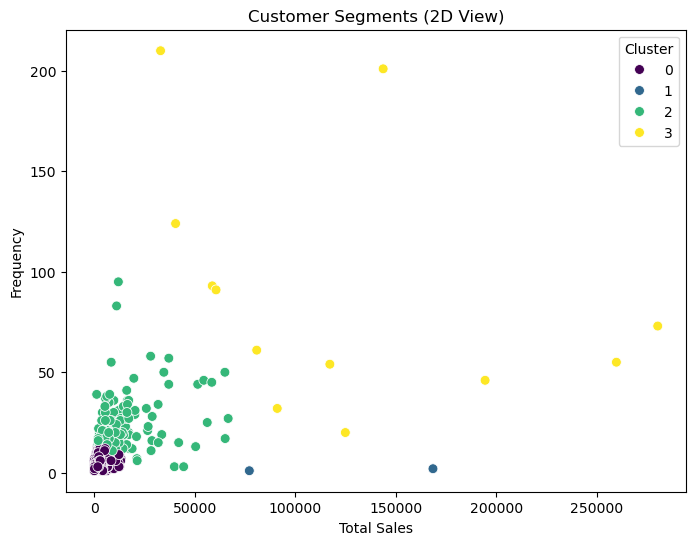

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_df, 
                x='TotalSales', 
                y='Frequency', 
                hue='Cluster', 
                palette='viridis', 
                s=50)

plt.title("Customer Segments (2D View)")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.legend(title="Cluster")
plt.show()


In [41]:
# Rename the strange BOM column to 'InvoiceNo'
Retail_store.rename(columns={'ï»¿InvoiceNo': 'InvoiceNo'}, inplace=True)


In [42]:
from datetime import timedelta

# Reference date = one day after the latest invoice
reference_date = Retail_store['InvoiceDate'].max() + timedelta(days=1)

# Compute Recency, Frequency, Monetary
rfm = Retail_store.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency = unique invoices
    'Sales': 'sum'           # Monetary = total spend
}).reset_index()

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

print(rfm.head())
print(rfm.describe())


   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.500000    51.000000     2.000000     668.570000
75%    16778.750000   142.000000     5.000000    1660.597500
max    18287.000000   374.000000   209.000000  280206.020000


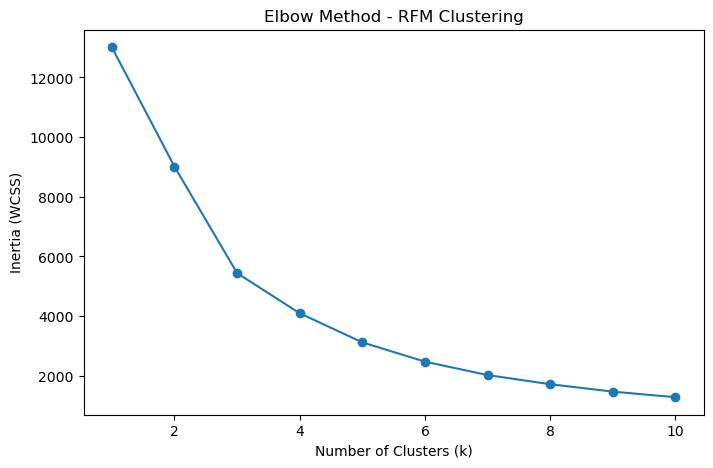


Cluster Profile Summary (RFM):
         Num_Customers     Recency  Frequency       Monetary
Cluster                                                     
0                 3054   43.702685   3.682711    1353.625312
1                 1067  248.075914   1.552015     478.848773
2                   13    7.384615  82.538462  127187.959231
3                  204   15.500000  22.333333   12690.500392


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select RFM Features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Step 2: Standardize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Step 3: Elbow Method for Optimal K
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method - RFM Clustering")
plt.show()

# Step 4: Apply KMeans (say k=4, based on elbow)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 5: Cluster Profile Summary
cluster_summary = rfm.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).rename(columns={'CustomerID': 'Num_Customers'})

print("\nCluster Profile Summary (RFM):")
print(cluster_summary)


In [8]:
Retail_store.to_csv("Retail_store_data.csv")

In [7]:
type(Retail_store)

pandas.core.frame.DataFrame